In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for plot visualization

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV

In [6]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import re

import warnings
# ignoring all the warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [15]:
import warnings
warnings.filterwarnings("ignore")
from python_utils import *

In [16]:
df = pd.read_csv('USA_Subnational_1_biomass_loss.csv')

In [17]:
df.head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg
0,United States,Alabama,10,13363464,9600146,9223176,1099303768,115
1,United States,Alabama,15,13363464,9474931,9129167,1095970776,116
2,United States,Alabama,20,13363464,9345561,9018703,1091712091,117
3,United States,Alabama,25,13363464,9241762,8983057,1088231701,118
4,United States,Alabama,30,13363464,9097763,8727123,1083171996,119


In [20]:
df.describe()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg
count,357.000000,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,357.000000
mean,32.142857,1.857026e+07,5.381306e+06,5.143689e+06,7.089286e+08,128.260504
std,21.218878,2.231642e+07,6.804037e+06,7.365764e+06,8.477328e+08,65.617267
min,10.000000,1.660700e+04,1.852000e+03,1.692000e+03,2.611990e+05,39.000000
25%,15.000000,8.436323e+06,1.302552e+06,1.146548e+06,1.525300e+08,99.000000
50%,25.000000,1.458448e+07,5.153934e+06,4.507031e+06,5.899075e+08,118.000000
75%,50.000000,2.198325e+07,7.659617e+06,7.286851e+06,8.669050e+08,133.000000
max,75.000000,1.505256e+08,5.655094e+07,6.293574e+07,4.108871e+09,509.000000


In [21]:
df.dtypes

country                      object
subnational1                 object
threshold                     int64
area_ha                       int64
extent_2000_ha                int64
extent_2010_ha                int64
abg_biomass_stock_2000_Mg     int64
avg_biomass_per_ha_Mg         int64
dtype: object

In [28]:
df.isna().sum()

country                      0
subnational1                 0
threshold                    0
area_ha                      0
extent_2000_ha               0
extent_2010_ha               0
abg_biomass_stock_2000_Mg    0
avg_biomass_per_ha_Mg        0
dtype: int64

In [23]:
df.corr()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg
threshold,1.000000e+00,2.475035e-18,-0.107415,-0.106677,-0.053980,0.159029
area_ha,2.475035e-18,1.000000e+00,0.799431,0.793361,0.498134,0.012826
extent_2000_ha,-1.074145e-01,7.994314e-01,1.000000,0.996977,0.666198,0.041359
extent_2010_ha,-1.066773e-01,7.933609e-01,0.996977,1.000000,0.646058,0.025091
abg_biomass_stock_2000_Mg,-5.398043e-02,4.981344e-01,0.666198,0.646058,1.000000,0.714343
avg_biomass_per_ha_Mg,1.590294e-01,1.282571e-02,0.041359,0.025091,0.714343,1.000000


In [24]:
corr_matrix = df.corr().abs()

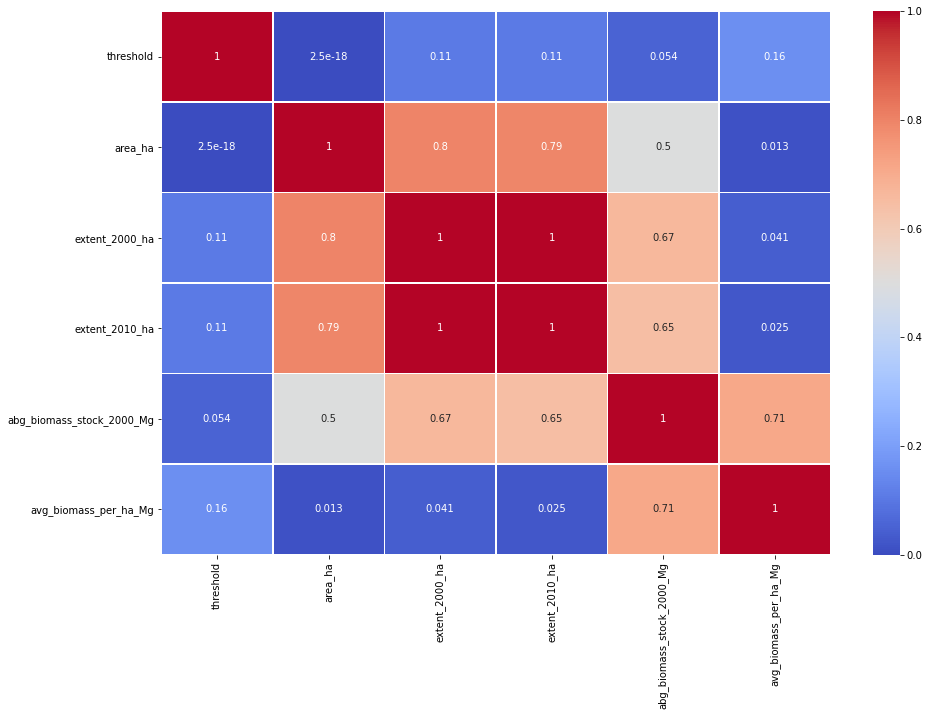

In [26]:
f, ax = plt.subplots(figsize=(15, 10)) 
heatmap = sns.heatmap(corr_matrix,linewidths = .5,cmap="coolwarm",annot=True)

In [30]:
df.shape

(357, 8)

In [31]:
df.columns

Index(['country', 'subnational1', 'threshold', 'area_ha', 'extent_2000_ha',
       'extent_2010_ha', 'abg_biomass_stock_2000_Mg', 'avg_biomass_per_ha_Mg'],
      dtype='object')

In [33]:
cond = [
    (df['avg_biomass_per_ha_Mg'] >= 200),
    (df['avg_biomass_per_ha_Mg'] <200) & (df['avg_biomass_per_ha_Mg'] >=100),
    (df['avg_biomass_per_ha_Mg'] <100)
    ]
val = ['High', 'Medium', 'Low']
df['avg_biomass_cat'] = np.select(cond,val)

In [35]:
df.head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat
0,United States,Alabama,10,13363464,9600146,9223176,1099303768,115,Medium
1,United States,Alabama,15,13363464,9474931,9129167,1095970776,116,Medium
2,United States,Alabama,20,13363464,9345561,9018703,1091712091,117,Medium
3,United States,Alabama,25,13363464,9241762,8983057,1088231701,118,Medium
4,United States,Alabama,30,13363464,9097763,8727123,1083171996,119,Medium


In [36]:
df1 = df.drop(labels=['country'], axis=1) 

In [37]:
df1.head()

,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat
0,Alabama,10,13363464,9600146,9223176,1099303768,115,Medium
1,Alabama,15,13363464,9474931,9129167,1095970776,116,Medium
2,Alabama,20,13363464,9345561,9018703,1091712091,117,Medium
3,Alabama,25,13363464,9241762,8983057,1088231701,118,Medium
4,Alabama,30,13363464,9097763,8727123,1083171996,119,Medium


In [39]:
df.head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat
0,United States,Alabama,10,13363464,9600146,9223176,1099303768,115,Medium
1,United States,Alabama,15,13363464,9474931,9129167,1095970776,116,Medium
2,United States,Alabama,20,13363464,9345561,9018703,1091712091,117,Medium
3,United States,Alabama,25,13363464,9241762,8983057,1088231701,118,Medium
4,United States,Alabama,30,13363464,9097763,8727123,1083171996,119,Medium


In [40]:
data_onehot_encoded = df1.copy()
data = pd.get_dummies(data_onehot_encoded, columns=['subnational1'])

In [41]:
data.head()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,abg_biomass_stock_2000_Mg,avg_biomass_per_ha_Mg,avg_biomass_cat,subnational1_Alabama,subnational1_Alaska,subnational1_Arizona,...,subnational1_South Dakota,subnational1_Tennessee,subnational1_Texas,subnational1_Utah,subnational1_Vermont,subnational1_Virginia,subnational1_Washington,subnational1_West Virginia,subnational1_Wisconsin,subnational1_Wyoming
0,10,13363464,9600146,9223176,1099303768,115,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,13363464,9474931,9129167,1095970776,116,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,13363464,9345561,9018703,1091712091,117,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,13363464,9241762,8983057,1088231701,118,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,13363464,9097763,8727123,1083171996,119,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Medium    246
Low        90
High       21
Name: avg_biomass_cat, dtype: int64

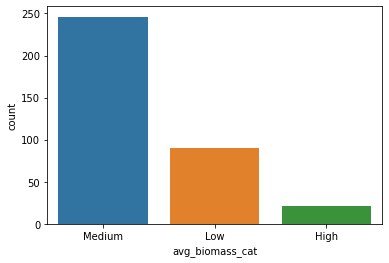

In [43]:
sns.countplot(x="avg_biomass_cat", data=data)
data.loc[:,'avg_biomass_cat'].value_counts()

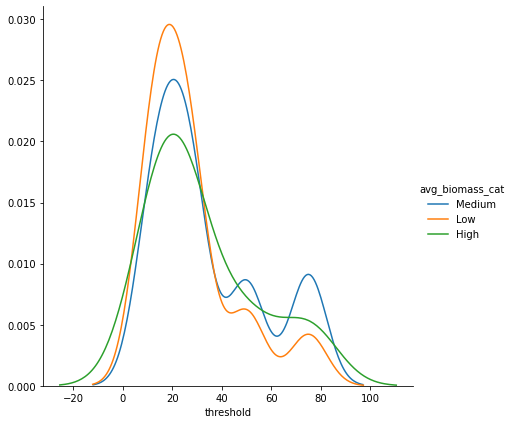

In [45]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "threshold") \
   .add_legend()

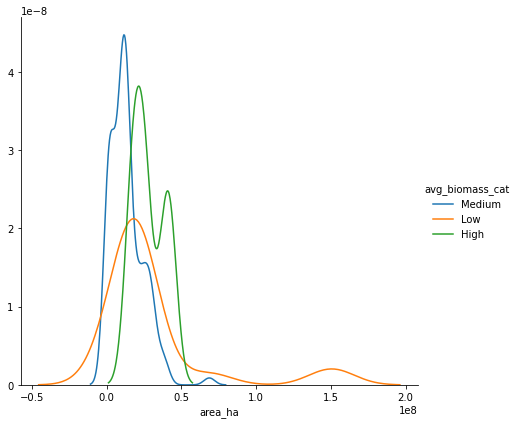

In [48]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "area_ha") \
   .add_legend()

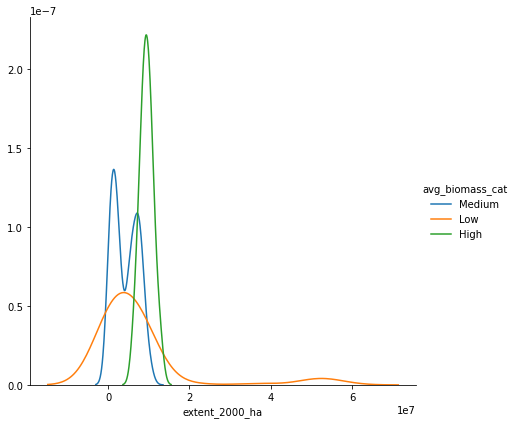

In [50]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "extent_2000_ha") \
   .add_legend()

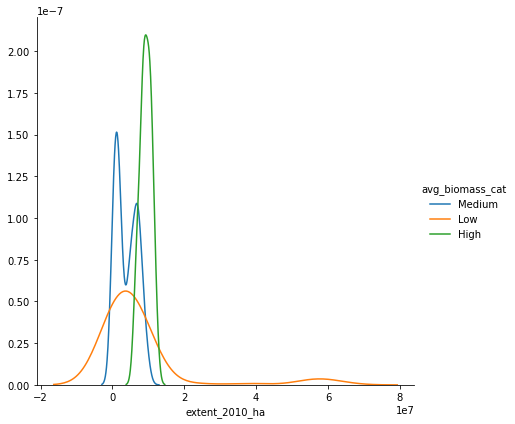

In [53]:
sns.FacetGrid(data, hue="avg_biomass_cat", size=6) \
   .map(sns.kdeplot, "extent_2010_ha") \
   .add_legend()

In [54]:
rand_state_ = 42
X_train, X_test, y_train, y_test = train_test_split(data.drop(['avg_biomass_cat'], axis=1), data.avg_biomass_cat, test_size=0.3, random_state=rand_state_)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [59]:
pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [63]:
class EvaluateClassifier():
    def __init__(self):
        self.classifiers = {}

    def evaluate_model(self, modelName, train_predictions, test_predictions):
        self.classifiers[modelName] = {
            'train_score': accuracy_score(y_train, train_predictions),            
            'test_score': accuracy_score(y_test, test_predictions)
        }

    def fit_and_predict_using_RandomSearchCV(self, classifier, grid_params):
        random_cv_model = RandomizedSearchCV(estimator=classifier, param_distributions=grid_params, cv=10)
        random_cv_model.fit(X_train, y_train)
        self.evaluate_model(classifier.__class__.__name__, random_cv_model.predict(X_train), random_cv_model.predict(X_test))
        self.classifiers[classifier.__class__.__name__]['estimator'] = random_cv_model.estimator
        return self.classifiers[classifier.__class__.__name__]

    def voting_classifier(self, classifier_names):
        selected_classifiers = [(classifier_name, self.classifiers[classifier_name]['estimator']) for classifier_name in classifier_names]
        voting_classifier = VotingClassifier(estimators=selected_classifiers, voting='soft')
        voting_classifier.fit(X_train, y_train)
        self.evaluate_model(voting_classifier.__class__.__name__, voting_classifier.predict(X_train), voting_classifier.predict(X_test))
        self.classifiers[voting_classifier.__class__.__name__]['estimator'] = voting_classifier
        return self.classifiers[voting_classifier.__class__.__name__]

## Decision Tree

In [64]:
eval_classifier1 = EvaluateClassifier()

In [70]:
# Decision Tree
dt_grid_param = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

acc_dt = eval_classifier1.fit_and_predict_using_RandomSearchCV(DecisionTreeClassifier(), dt_grid_param)
acc_dt

{'train_score': 0.7791164658634538,
 'test_score': 0.7685185185185185,
 'estimator': DecisionTreeClassifier()}

## Random Forest

In [71]:
eval_classifier2 = EvaluateClassifier()

In [73]:
rf_grid_param = {
    'n_estimators': [10, 30, 60, 90, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

acc_rf = eval_classifier2.fit_and_predict_using_RandomSearchCV(RandomForestClassifier(), rf_grid_param)
acc_rf

{'train_score': 0.9919678714859438,
 'test_score': 0.9907407407407407,
 'estimator': RandomForestClassifier()}

## KNN Clasifier

In [75]:
eval_classifier3 = EvaluateClassifier()

In [76]:
# KNN clasifier
knn_grid_params = {
    'n_neighbors': [5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

eval_classifier3.fit_and_predict_using_RandomSearchCV(KNeighborsClassifier(), knn_grid_params)

{'train_score': 1.0,
 'test_score': 0.9814814814814815,
 'estimator': KNeighborsClassifier()}

## Extra Trees Classifier

In [79]:
eval_classifier4 = EvaluateClassifier()

In [81]:
eval_classifier4.fit_and_predict_using_RandomSearchCV(ExtraTreesClassifier(), {
    'n_estimators': [20, 40],
    'min_samples_split': [2, 3],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt']
})

{'train_score': 1.0,
 'test_score': 0.9722222222222222,
 'estimator': ExtraTreesClassifier()}

## Ridge Classifier

In [85]:
eval_classifier5 = EvaluateClassifier()

In [87]:
# RidgeClassifier
eval_classifier5.fit_and_predict_using_RandomSearchCV(RidgeClassifier(), {
    'alpha': [0.8, 1, 7, 13, 17],
    'random_state': [rand_state_]
})

{'train_score': 0.9518072289156626,
 'test_score': 0.9722222222222222,
 'estimator': RidgeClassifier()}

## Logistic Regression

In [89]:
eval_classifier6 = EvaluateClassifier()

In [91]:
eval_classifier6.fit_and_predict_using_RandomSearchCV(LogisticRegression(), {
    'C': [0.5, 1.0, 1,5],
    'random_state': [rand_state_],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150],
    'multi_class': ['auto'],
    'warm_start': [True]
})

{'train_score': 0.9919678714859438,
 'test_score': 0.9907407407407407,
 'estimator': LogisticRegression()}

## Gradient Boosting Classifier

In [93]:
eval_classifier7 = EvaluateClassifier()

In [95]:
# GradientBoostingClassifier - Overfit the model, not feasible

eval_classifier7.fit_and_predict_using_RandomSearchCV(GradientBoostingClassifier(), {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [100, 120, 150],
    'random_state': [rand_state_],
    'min_samples_split': [2, 3, 4],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
})

{'train_score': 1.0,
 'test_score': 1.0,
 'estimator': GradientBoostingClassifier()}

## Chossing KNN classifier as the best model

In [99]:
import pickle
filename = 'USA_Subnational_1_biomass_loss.pkl'
pickle.dump(eval_classifier3, open(filename, 'wb'))